In [49]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("titanic.csv")
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [37]:
inputs = df.drop(['PassengerId','PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')

In [38]:
target = df['Survived']

In [39]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [40]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
df.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
from sklearn.preprocessing import LabelEncoder
le_Pclass = LabelEncoder()
le_Sex = LabelEncoder()
le_Age = LabelEncoder()
le_Fare = LabelEncoder()

In [43]:
inputs['Pclass_n'] = le_Pclass.fit_transform(inputs['Pclass'])
inputs['Sex_n'] = le_Sex.fit_transform(inputs['Sex'])
inputs['Age_n'] = le_Age.fit_transform(inputs['Age'])
inputs['Fare_n'] = le_Fare.fit_transform(inputs['Fare'])

In [44]:
inputs

,Pclass,Sex,Age,Fare,Pclass_n,Sex_n,Age_n,Fare_n
0,3,male,22.0,7.2500,2,1,28,18
1,1,female,38.0,71.2833,0,0,51,207
2,3,female,26.0,7.9250,2,0,34,41
3,1,female,35.0,53.1000,0,0,47,189
4,3,male,35.0,8.0500,2,1,47,43
...,...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,1,1,35,85
887,1,female,19.0,30.0000,0,0,24,153
888,3,female,NaN,23.4500,2,0,90,131
889,1,male,26.0,30.0000,0,1,34,153


In [93]:
inputs_n = inputs.drop(['Pclass', 'Sex', 'Age_n','Fare'], axis='columns')
inputs_n.head(10)

,Age,Pclass_n,Sex_n,Fare_n
0,22.0,2,1,18
1,38.0,0,0,207
2,26.0,2,0,41
3,35.0,0,0,189
4,35.0,2,1,43
5,NaN,2,1,51
6,54.0,0,1,186
7,2.0,2,1,124
8,27.0,2,0,74
9,14.0,1,0,154


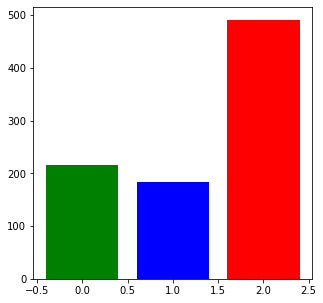

In [86]:
plt.figure(figsize=(5,5))
plt.bar(list(inputs_n['Pclass_n'].value_counts().keys()),list(inputs_n['Pclass_n'].value_counts()),color = ['r','g','b'])
plt.show()

In [69]:
inputs_n['Pclass_n'].value_counts()

2    491
0    216
1    184
Name: Pclass_n, dtype: int64

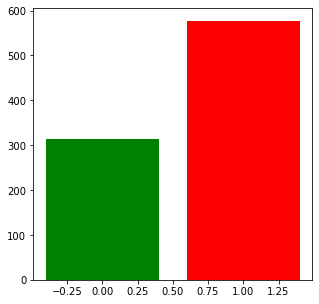

In [87]:
plt.figure(figsize=(5,5))
plt.bar(list(inputs_n['Sex_n'].value_counts().keys()),list(inputs_n['Sex_n'].value_counts()),color = ['r','g'])
plt.show()

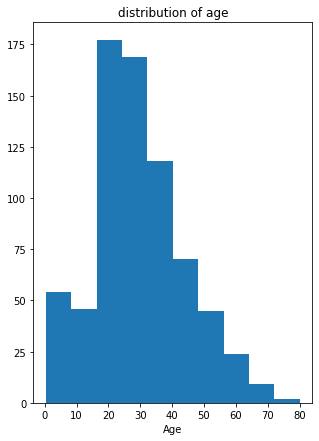

In [94]:
plt.figure(figsize=(5,7))
plt.hist(inputs_n['Age'])
plt.title("distribution of age")
plt.xlabel("Age")
plt.show()

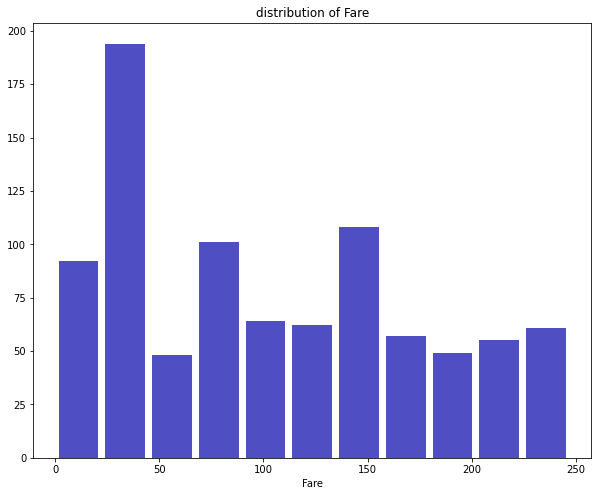

In [107]:
plt.figure(figsize=(10,8))
plt.hist(inputs_n['Fare_n'],bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title("distribution of Fare")
plt.xlabel("Fare")
plt.show()